## <center> *** CAR PRICE PREDICTION PROJECT *** </center>

## <center> A Task executed by Abdulbasiru Rabilu as part of the Internship tasks from CodeAlpha </center>

#### Table of Contents
  1. Installing and impoting dependencies
  2. Exploratory Data Analysis (EDA)
  3. Data Cleaning and Transformation
  4. Data Visualisation
  5. Model Training and Evaluation
  6. Model Selection


## Importing Dependencies

In [2]:
# importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [3]:
# Loading the dataset to pandas DataFrames
car_data = pd.read_csv(r"C:\Users\MUSTY\Desktop\car data.csv")

In [4]:
# Exploring the first  5 rows of the dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Checking the Statistics of the dataset
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Exploring the number of rows and column of the dataset
car_data.shape

(301, 9)

In [7]:
# Checking the data type of each column of the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Checking the null entries
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Exploring individual column of the dataset
car_data['Car_Name'].describe()

count      301
unique      98
top       city
freq        26
Name: Car_Name, dtype: object

## Data Cleaning and Transformation

In [10]:
# Checking the duplicate values
car_data.duplicated().sum()

np.int64(2)

In [11]:
car_data = car_data.drop_duplicates()

In [12]:
car_data.duplicated().sum()

np.int64(0)

In [13]:
# Checking categorical data distribution
print (car_data['Fuel_Type'].value_counts())
print(car_data['Selling_type'].value_counts())
print(car_data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [14]:
# Encoding "Fuel_type" column to numerical data type
car_data.replace({'Fuel_Type' : {'Petrol' :0, 'Diesel' :1, 'CNG':2}}, inplace = True)

# Encoding "Selling_type" to numerical data type
car_data.replace({'Selling_type' : {'Dealer' : 0, 'Individual' : 1 }}, inplace = True)

# Encoding "Transmission" column to numerical data  type
car_data.replace({'Transmission' :  {'Automatic' : 0, 'Manual': 1}}, inplace = True)

C:\Users\MUSTY\AppData\Local\Temp\ipykernel_11468\2019723667.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type' : {'Petrol' :0, 'Diesel' :1, 'CNG':2}}, inplace = True)
C:\Users\MUSTY\AppData\Local\Temp\ipykernel_11468\2019723667.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Selling_type' : {'Dealer' : 0, 'Individual' : 1 }}, inplace = True)
C:\Users\MUSTY\AppData\Local\Temp\ipykernel_11468\2019723667.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and wil

In [15]:
# Checking the effect of our encoding
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [16]:
# Checking the effect of our encoding
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [17]:
# Checking encoded 'Fuel_Type' column
print (car_data['Fuel_Type'].value_counts())

Fuel_Type
0    239
1     58
2      2
Name: count, dtype: int64


## Data Visualization

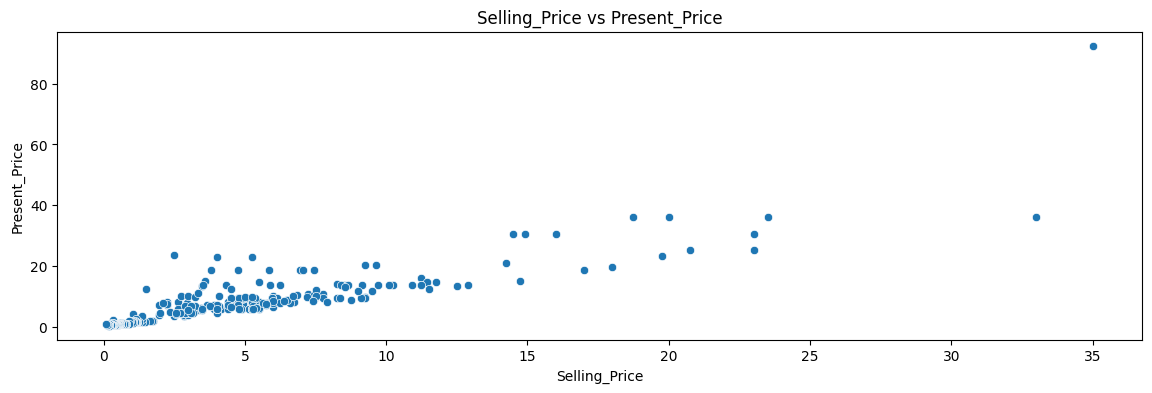

In [18]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Selling_Price', y='Present_Price', data=car_data)
plt.title('Selling_Price vs Present_Price')
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.show()

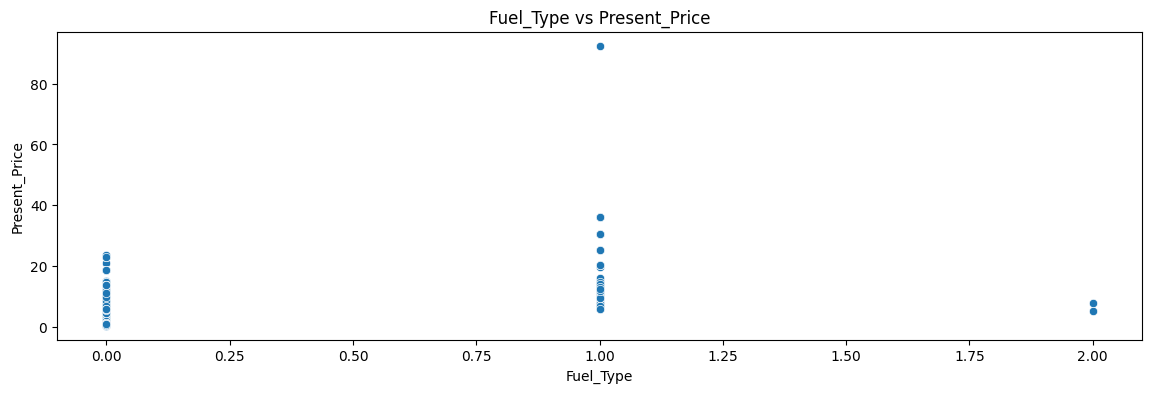

In [19]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Fuel_Type', y='Present_Price', data=car_data)
plt.title('Fuel_Type vs Present_Price')
plt.xlabel('Fuel_Type')
plt.ylabel('Present_Price')
plt.show()

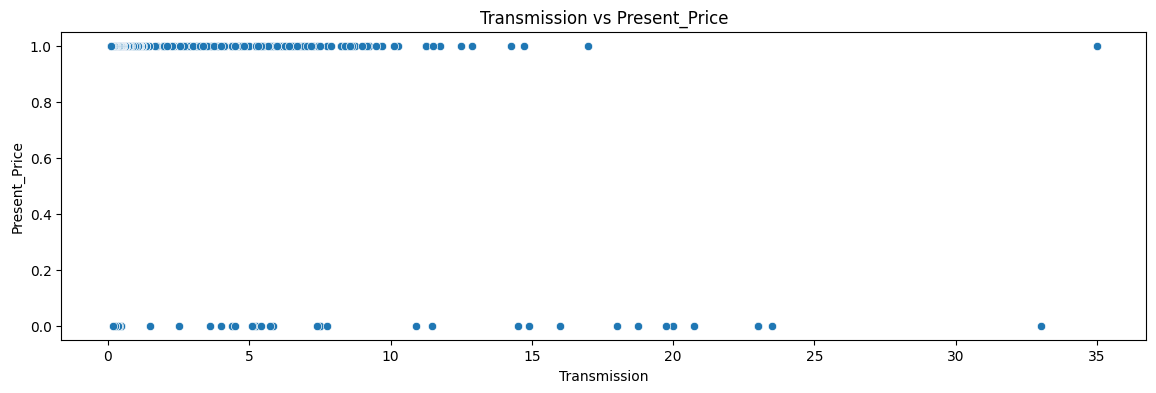

In [20]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Selling_Price', y='Transmission', data=car_data)
plt.title('Transmission vs Present_Price')
plt.xlabel('Transmission')
plt.ylabel('Present_Price')
plt.show()

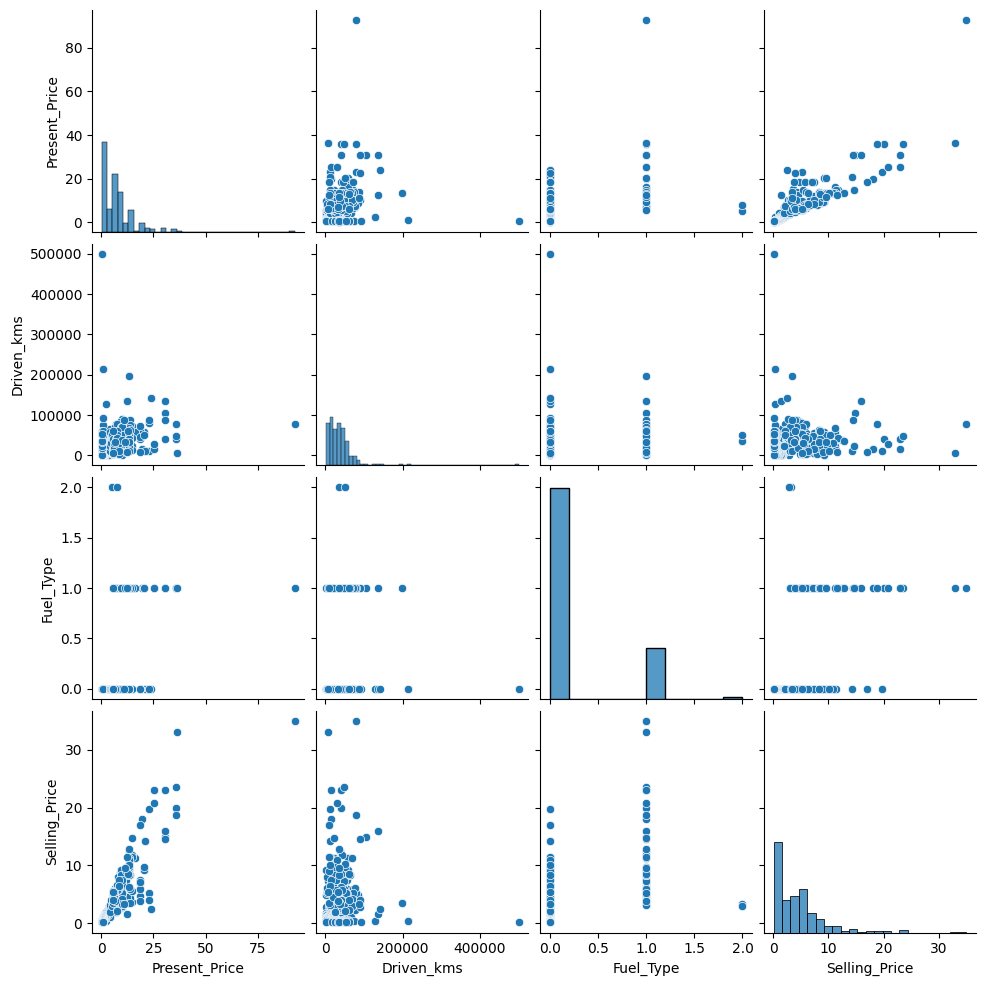

In [21]:
sns.pairplot(car_data[['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_Price']])
plt.show()

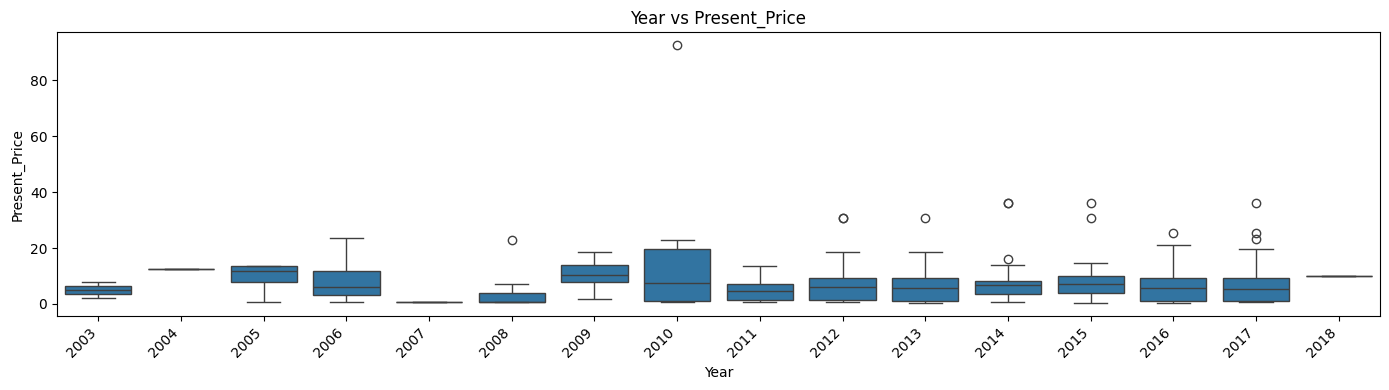

In [22]:
plt.figure(figsize=(14,4))
sns.boxplot(x='Year', y='Present_Price', data=car_data)
plt.title('Year vs Present_Price')
plt.xlabel('Year')
plt.ylabel('Present_Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

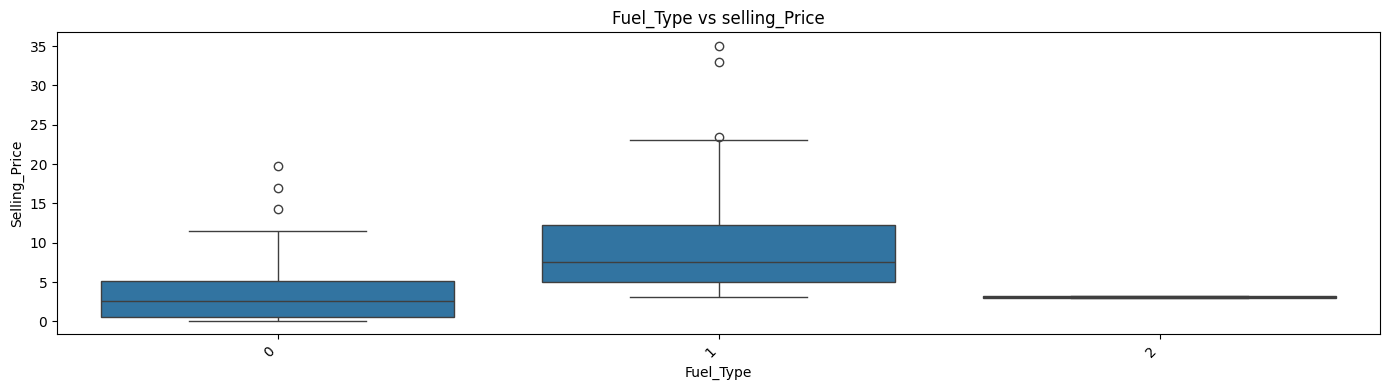

In [23]:
plt.figure(figsize=(14,4))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Fuel_Type vs selling_Price')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

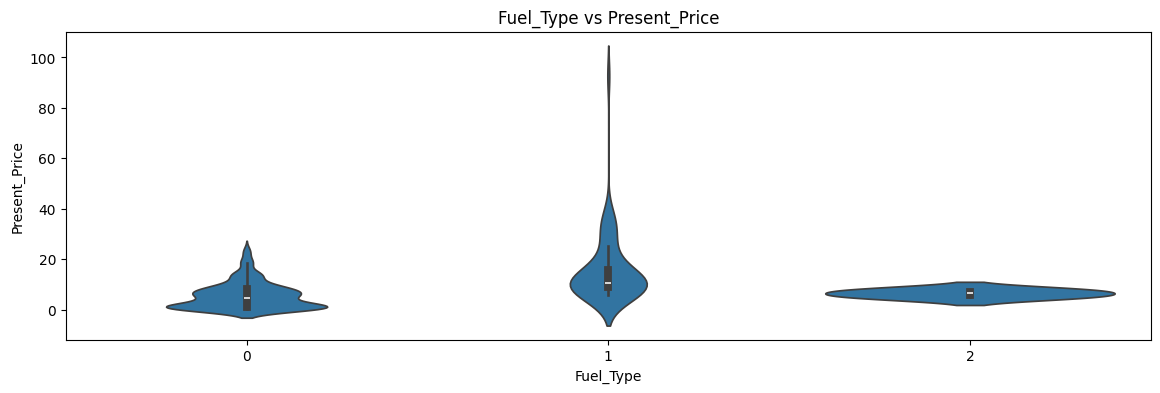

In [24]:
plt.figure(figsize=(14,4))
sns.violinplot(x='Fuel_Type', y='Present_Price', data=car_data)
plt.title('Fuel_Type vs Present_Price')
plt.xlabel('Fuel_Type')
plt.ylabel('Present_Price')
plt.show()

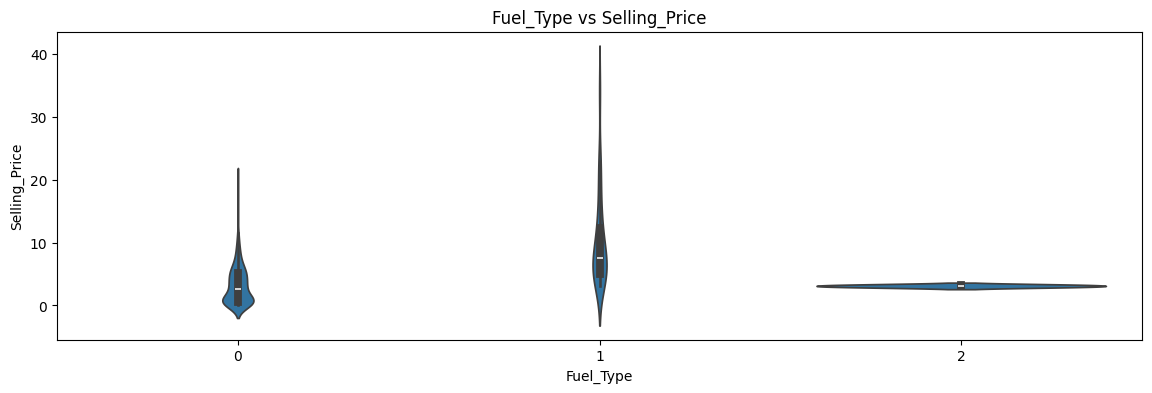

In [25]:
plt.figure(figsize=(14,4))
sns.violinplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Fuel_Type vs Selling_Price')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.show()

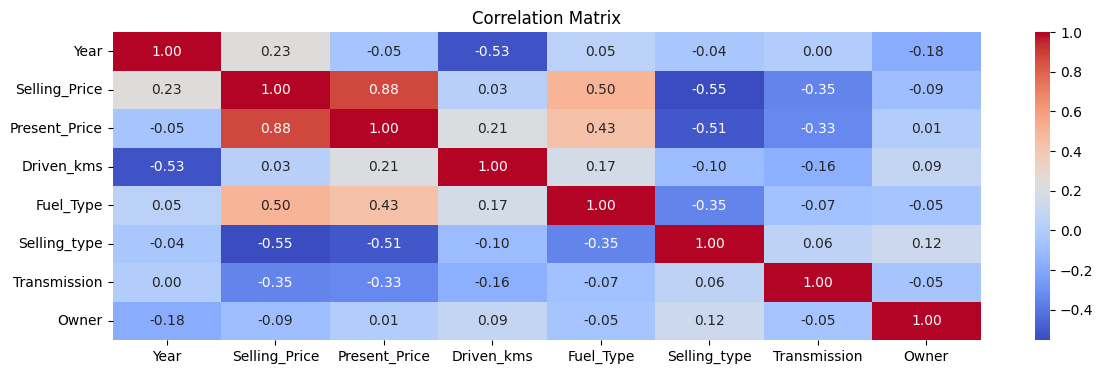

In [26]:
# Correlation matrix 
plt.figure(figsize=(14,4))
sns.heatmap(car_data.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

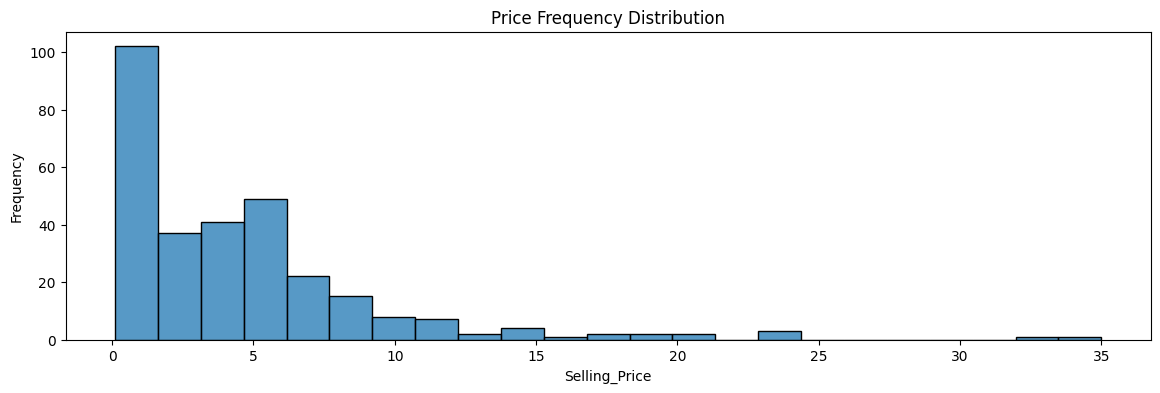

In [27]:
plt.figure(figsize=(14,4))
sns.histplot(car_data['Selling_Price'])
plt.title('Price Frequency Distribution')
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.show()

## Model Training and Evaluation

## Model Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [47]:
# Splitting the dataset into trainig and testing sets
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']


In [48]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,0,0,1,0
3,2011,4.15,5200,0,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,0,0,1,0
298,2009,11.00,87934,0,0,1,0
299,2017,12.50,9000,1,0,1,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# test_size = 0.2 means 20% of the datawill be used for testing 
# random_state ensures reproducibility of the split

In [50]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

### Training on Linear Regression Model

In [52]:
# Initialise the model
linear_reg = LinearRegression()
# Train the model on training data
linear_reg.fit(X_train, y_train)
# Make preidiction on the test set
y_pred_linear = linear_reg.predict(X_test)


In [54]:
# Evalute the model 
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print (f"Linear Regression -  Mean Squared Error: {mse_linear:.2f}")
print (f"Linear Regression - R-Squared: {r2_linear:.2f}")

Linear Regression -  Mean Squared Error: 6.68
Linear Regression - R-Squared: 0.74


### Training a Random Forest Regressor Model

In [55]:
# Initialize the model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
# n_estimators controls the number of trees in the forest

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Regressor - R-squared: {r2_rf:.2f}")

Random Forest Regressor - Mean Squared Error: 10.63
Random Forest Regressor - R-squared: 0.59


### Training GradientBoostingRegressor Model

In [56]:
# Initialize the model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# n_estimators: number of boosting stages
# learning_rate: step size shrinkage to prevent overfitting
# max_depth: maximum depth of the individual regression estimators

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor - Mean Squared Error: {mse_gb:.2f}")
print(f"Gradient Boosting Regressor - R-squared: {r2_gb:.2f}")

Gradient Boosting Regressor - Mean Squared Error: 7.78
Gradient Boosting Regressor - R-squared: 0.70


In [58]:
# Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print(f"Best Gradient Boosting Regressor - Mean Squared Error: {mse_best_gb:.2f}")
print(f"Best Gradient Boosting Regressor - R-squared: {r2_best_gb:.2f}")
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Gradient Boosting Regressor - Mean Squared Error: 6.93
Best Gradient Boosting Regressor - R-squared: 0.73
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [67]:
pred_df = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':y_pred_gb, 'Difference': y_test - y_pred_gb })

In [68]:
pred_df

,Actual Price,Predicted Price,Difference
283,8.99,9.197460,-0.207460
267,8.35,8.489436,-0.139436
166,0.45,0.487523,-0.037523
9,7.45,7.083368,0.366632
78,5.25,15.607951,-10.357951
280,5.25,4.886098,0.363902
95,5.85,5.313684,0.536316
111,1.15,1.269787,-0.119787
5,9.25,8.617357,0.632643
175,0.38,0.340880,0.039120


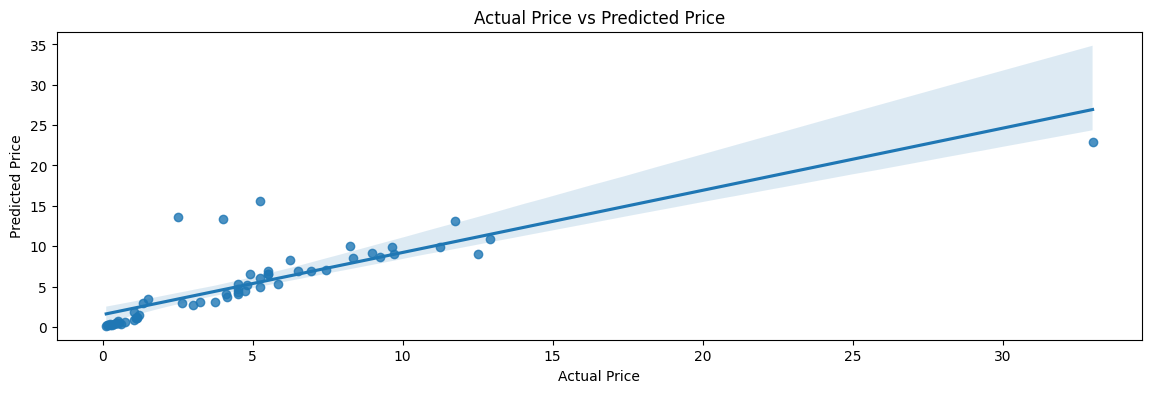

In [70]:
plt.figure(figsize=(14,4))
sns.regplot(x=y_test, y=y_pred_gb)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### Best Model Selection
Mean Squared Error (MSE): This is metric that measures the average squared difference between the predicted and actual car prices.
A lower MSE indicates better performance, as the pedictions are closer to the true values.
Linear Regression has the lowest MSE of 6.8 among the three model that are used.
    Linear Regression : 6.8
    Gradient Boosting Regressor : 7.78
    Random Forest Regressor: 10.63
R squared (R2): This metric represents the proportion the proportion of the variance in car prices that is explained by the model. A higher R2 indicates
a better fit, as the model can explain more of the variability in the target variable.
Linear Regression has the highest R2 value of 0.74 against the 0.70 and 0.59 of Gradient Boosting Regressor and Random Forest Regressor respectively.

### Conclusion
Based on this Analysis, Linear Regression is the model for this Car Price Prediction task. It has the Lowest MSE, indicating the highest accuracy,
and the highest R-squared, indicating the best fit to the data.
The superior performance of Linear Regression suggests that the relationship between the car features and prices is largely linear. 
Linear Regression excels at capturing these linear relationships, while more complex models like Random Forest and Gradient Boosting might be
capturing noise or overfitting the data.